In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates
import numpy as np

In [63]:
data = pd.read_csv('dane/main data/hydro_klimat_merged_data.csv')

In [64]:
data['Data'] = pd.to_datetime(data['Data'])

In [65]:
data.sort_values(by='Data', inplace=True)

In [66]:
# data_ina = data[['Nazwa stacji', 'Data', 'Stan wody [cm]', \
#                 'Maksymalna temperatura dobowa [°C]', 'Minimalna temperatura dobowa [°C]',\
#                'Średnia temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C]', \
#                 'Suma dobowa opadów nowa [mm]', 'Rodzaj opadu [S/W/]', 'Wysokość pokrywy śnieżnej [cm]',\
#                 'Nazwa rzeki/jeziora', 'Przepływ [m^3/s]', 'Temperatura wody [st. C]'\
#                ]][data['Nazwa rzeki/jeziora'] == 'INA (198)']

# data_san = data[['Nazwa stacji', 'Data',  'Stan wody [cm]',\
#                 'Maksymalna temperatura dobowa [°C]', 'Minimalna temperatura dobowa [°C]',\
#                'Średnia temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C]', \
#                 'Suma dobowa opadów nowa [mm]', 'Rodzaj opadu [S/W/]', 'Wysokość pokrywy śnieżnej [cm]',\
#                 'Nazwa rzeki/jeziora', 'Przepływ [m^3/s]', 'Temperatura wody [st. C]'\
#                ]][data['Nazwa rzeki/jeziora'] == 'SAN (22)'] 

data_bug= data[['Nazwa stacji', 'Data',  'Stan wody [cm]',\
                'Maksymalna temperatura dobowa [°C]', 'Minimalna temperatura dobowa [°C]',\
               'Średnia temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C]', \
                'Suma dobowa opadów nowa [mm]', 'Rodzaj opadu [S/W/]', 'Wysokość pokrywy śnieżnej [cm]',\
                'Nazwa rzeki/jeziora', 'Przepływ [m^3/s]', 'Temperatura wody [st. C]'\
               ]][data['Nazwa rzeki/jeziora'] == 'BUG (266)'] 

one-hot encoding rodzaj opadu

Zastosowano one-hot encoding na kolumnie ‘Rodzaj opadu’, ponieważ model LSTM wymaga danych liczbowych.

In [67]:
# data_ina['Rodzaj opadu [S/W/]'] = data_ina['Rodzaj opadu [S/W/]'].fillna('no_precip')
# encoded = pd.get_dummies(data_ina['Rodzaj opadu [S/W/]'], prefix='opad')
# data_ina = data_ina.join(encoded)

# data_san['Rodzaj opadu [S/W/]'] = data_san['Rodzaj opadu [S/W/]'].fillna('no_precip')
# encoded = pd.get_dummies(data_san['Rodzaj opadu [S/W/]'], prefix='opad')
# data_san = data_san.join(encoded)

data_bug['Rodzaj opadu [S/W/]'] = data_bug['Rodzaj opadu [S/W/]'].fillna('no_precip')
encoded = pd.get_dummies(data_bug['Rodzaj opadu [S/W/]'], prefix='opad')
data_bug = data_bug.join(encoded)

In [68]:
# dzien_san = data_san['Data']
# suma_opadow_san = data_san['Suma dobowa opadów nowa [mm]']
# poziom_wody_san = data_san['Stan wody [cm]']
# przeplyw_san = data_san['Przepływ [m^3/s]']
# temp_sr_san = data_san['Średnia temperatura dobowa [°C]']
# pokr_sn_san = data_san['Wysokość pokrywy śnieżnej [cm]']
# temp_min_grunt_san = data_san['Temperatura minimalna przy gruncie [°C]']

Wykres poziom wód w czasie

In [69]:
# fig, ax1 = plt.subplots(figsize=(12, 6))

# color = 'tab:blue'
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Suma opadów [mm]', color=color)
# # ax1.plot(dzien, -suma_opadow_pszcz, color=color)  # Inverse plot for rainfall
# ax1.bar(dzien_san, suma_opadow_san, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# # #ustawienie osi X
# # ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Show every 7 days
# # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD
# plt.xticks(rotation=45)

# ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
# color = 'tab:red'
# ax2.set_ylabel('Poziom wody [cm]', color=color)
# ax2.plot(dzien_san, poziom_wody_san, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # To ensure no overlap of y-axis labels
# plt.title('Suma opadów i poziom wody rzeki San na stacji Pszczyna')
# plt.show()

Wykres za ostatnie 100 dni

In [70]:
# data_san_100 = data_san.sort_values(by=['Data'])[-100:]
# dzien_san_100 = data_san_100['Data']
# suma_opadow_san_100 = data_san_100['Suma dobowa opadów nowa [mm]']
# poziom_wody_san_100 = data_san_100['Stan wody [cm]']
# przeplyw_san_100 = data_san_100['Przepływ [m^3/s]']
# temp_sr_san_100 = data_san_100['Średnia temperatura dobowa [°C]']
# pokr_sn_san_100 = data_san_100['Wysokość pokrywy śnieżnej [cm]']
# temp_min_grunt_san_100 = data_san_100['Temperatura minimalna przy gruncie [°C]']

In [71]:
# fig, ax1 = plt.subplots(figsize=(12, 6))

# color = 'tab:blue'
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Suma opadów [mm]', color=color)
# # ax1.plot(dzien, -suma_opadow_pszcz, color=color)  # Inverse plot for rainfall
# ax1.bar(dzien_san_100, suma_opadow_san_100, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# # #ustawienie osi X
# # ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Show every 7 days
# # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD
# plt.xticks(rotation=45)

# ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
# color = 'tab:red'
# ax2.set_ylabel('Poziom wody [cm]', color=color)
# ax2.plot(dzien_san_100, poziom_wody_san_100, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # To ensure no overlap of y-axis labels
# plt.title('Suma opadów i poziom wody rzeki San na stacji Pszczyna')
# plt.show()

Usunięcie niepotrzebnych kolumn (wartosci nienumeryczne)

In [72]:
# data_ina = data_ina.drop(columns=['Data', 'Rodzaj opadu [S/W/]', 'Nazwa rzeki/jeziora', 'Nazwa stacji',\
#                                   'Temperatura wody [st. C]'])

# data_san = data_san.drop(columns=['Data', 'Rodzaj opadu [S/W/]', 'Nazwa rzeki/jeziora', 'Nazwa stacji', \
#                                   'Temperatura wody [st. C]'])

data_bug = data_bug.drop(columns=['Data', 'Rodzaj opadu [S/W/]', 'Nazwa rzeki/jeziora', 'Nazwa stacji', 'opad_no_precip'])


Podział zbioru

Podział na train, valid, test w proporcji 70/15/15

In [73]:
total_samples_bug = len(data_bug)
train_end_bug = int(total_samples_bug * 0.7)
validation_end_bug = int(total_samples_bug * 0.85)

train_bug = data_bug[:train_end_bug]
validation_bug = data_bug[train_end_bug:validation_end_bug]
test_bug = data_bug[validation_end_bug:]

In [74]:
print(len(train_bug), len(validation_bug), len(test_bug))

745 160 160


Metoda naiwna 

In [75]:
n_ahead = 3
y_validation = validation_bug.iloc[0]
y_test = test_bug.iloc[0]

In [76]:
#na całości, kod z DL Chollet strona 222
def evaluate_naive_method_valid():
    batch_maes = []
    for i, step in enumerate(range(len(y_validation)- n_ahead)):
        preds, targets = y_validation[i], y_validation[i+n_ahead]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    return np.mean(batch_maes)
    
print(evaluate_naive_method_valid())
#gdyby patrzeć tylko na dzień poprzedni o ile średnio taki wynik by się mylił (uwaga! miara mae taka jak w modelu!)

67.4125


In [77]:
def evaluate_naive_method_test():
    batch_maes = []
    for i, step in enumerate(range(len(y_test)-n_ahead)):
        preds, targets = y_test[i], y_test[i+n_ahead]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    return np.mean(batch_maes)
    
print(evaluate_naive_method_test())

61.73750000000001


#### Utworzenie sekwencji, aby można było predykować na szeregach czasowych 

In [78]:
def create_sequences(input_data, n_steps, n_ahead=1):
    X, y = [], []
    for i in range(len(input_data) - n_steps - n_ahead + 1):
        #indeks końca sekwencji
        end_ix = i + n_steps
        #Tworzenie sekwencji
        seq_x = input_data[i:end_ix, :]  # cechy i poziom wod w sekwencji wybranej dlugosci
        seq_y = input_data[end_ix+n_ahead-1, 0]  # poziom wód nastepnego dnia (lub nastepnego n_ahead dni dalej) po zakresie w wektorze cech
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [79]:
# # Załóżmy że masz surowe dane (np. z jednej stacji)
# print(train_bug[:10, 0])  # pierwsze 10 wartości poziomu wód

# X_check, y_check = create_sequences(train_bug, n_steps=5, n_ahead=3)

# # Pierwsza sekwencja:
# print("X[0] (poziom wód w sekwencji):", X_check[0][:, 0])
# print("y[0] (poziom wód etykieta):", y_check[0])
# #dziala dobrze

Wybór sekwencji

In [80]:
# train_san

In [81]:
#uwaga zmiana typu danych!!
train_bug = train_bug.to_numpy()
validation_bug = validation_bug.to_numpy()
test_bug = test_bug.to_numpy()

In [82]:
n_steps = 1 #długość sekwencji
n_ahead = 3

X_train, y_train = create_sequences(train_bug, n_steps=n_steps, n_ahead=n_ahead)
X_validation, y_validation = create_sequences(validation_bug, n_steps=n_steps, n_ahead=n_ahead)
X_test, y_test = create_sequences(test_bug, n_steps=n_steps, n_ahead=n_ahead)

In [83]:
y_train.shape

(742,)

Normalizacja zbioru treningowego

In [84]:
X_train.shape #drugi wymiar to n_steps

(742, 1, 11)

In [85]:
n_train, steps, features = X_train.shape
print(features)
print(X_train.reshape(-1, features).shape)
X_train.reshape(-1, features)

11
(742, 11)


array([[380. ,  10.2,   4.1, ...,  10.6,   0. ,   0. ],
       [377. ,   9.2,  -1.4, ...,  10. ,   0. ,   1. ],
       [372. ,  13.2,   8.5, ...,   9.8,   0. ,   1. ],
       ...,
       [357. ,   2.9,  -0.5, ...,   2.2,   1. ,   0. ],
       [367. ,   0.4,  -2.8, ...,   2. ,   1. ,   0. ],
       [378. ,  -1.1,  -4.3, ...,   1.8,   1. ,   0. ]])

In [86]:
from sklearn.preprocessing import StandardScaler

#Zakładamy, że dane mają kształt: (próbki, kroki_czasowe, cechy)
n_train, steps, features = X_train.shape
n_val = X_validation.shape[0]
n_test = X_test.shape[0]

# Przekształcenie do 2D (scalanie kroków czasowych i próbek)
X_train_2d = X_train.reshape(-1, features)
X_val_2d = X_validation.reshape(-1, features)
X_test_2d = X_test.reshape(-1, features)

#Skalowanie
scaler = StandardScaler()
# StandardScaler oblicza średnią i odchylenie tylko z danych treningowych (fit_transform)
X_train_scaled = scaler.fit_transform(X_train_2d) 
#Potem tę samą skalę stosujemy do walidacji i testu (transform) (ochrona przed data_leakage)
X_val_scaled = scaler.transform(X_val_2d)
X_test_scaled = scaler.transform(X_test_2d)

# Przywrócenie oryginalnych kształtów
X_train = X_train_scaled.reshape(n_train, steps, features)
X_validation = X_val_scaled.reshape(n_val, steps, features)
X_test = X_test_scaled.reshape(n_test, steps, features)

In [87]:
X_train.shape

(742, 1, 11)

In [88]:
# mean_train_san = train_san.mean(axis=0)
# train_san -= mean_train_san
# std_san = train_san.std(axis=0)
# train_san /= std_san

In [89]:
#sprawdzenie zmienności zmiennej celu
print(y_train.min(), y_train.max())
print(np.mean(y_train), np.std(y_train))
#zmienność nei jest zbyt duża, dlatego nie skaluję na razie

210.0 771.0
388.23315363881403 121.99971645287896


In [90]:
# #do ewentulanego przetestowania czy poprawi wyniki
# from sklearn.preprocessing import StandardScaler

# y_scaler = StandardScaler()
# y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
# y_val_scaled = y_scaler.transform(y_validation.reshape(-1, 1))
# y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))


In [91]:
# np.mean(np.abs(y_validation[-2]-y_validation[-1]))

In [32]:
#czyli na danych nienormalizowanych 
# 0.44248616167015586 * np.std(validation_san[:, 1]) #musi być san bo sprawdam std przed walidacją
# 3.8cm

In [33]:
# validation_san[:, 1]

Płaska sieć z jedną gęstą warstwą (str 494 ML)

In [34]:
X_train.shape[-1]

11

In [35]:
# # from keras.models import Sequential
# # from keras import layers
# # from keras.layers import Flatten, Dense
# import keras

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[n_steps, X_train.shape[-1]]), #input_shape = (timesteps, features)
#     keras.layers.Dense(1)
# ])

# model.compile(optimizer='adam', loss='mae')

In [36]:
# history = model.fit(
#     X_train, y_train,
#     epochs=20,
#     validation_data=(X_validation, y_validation)
# )

In [37]:
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Training History')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

In [38]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(loss))

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Strata trenowania')
# plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
# plt.title('Strata trenowania i walidacji')
# plt.legend()

# plt.show()

In [39]:
# min(val_loss)

Prosty model rekurencyjny

In [40]:
# X_train.shape

In [41]:
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [42]:
# # import keras

# model = keras.models.Sequential([
#     keras.layers.SimpleRNN(1, activation='relu',  input_shape=[None, X_train.shape[2]]) #tutaj daję wartość none, żeby mogła wykryć zalezności czasowe
# ])

# model.compile(optimizer='adam', loss='mae')

In [43]:
# history = model.fit(
#     X_train, y_train,
#     epochs=30,
#     validation_data=(X_validation, y_validation)
# )

In [44]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(loss))

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Strata trenowania')
# plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
# plt.title('Strata trenowania i walidacji')
# plt.legend()

# plt.show()

In [45]:
# min(val_loss) #źle to wygląda

Prosty model LSTM

In [101]:
import keras
model = keras.models.Sequential([
    keras.layers.LSTM(256, activation='relu', input_shape=(n_steps, X_train.shape[2])),  # '2' represents the number of features in each time step
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')


C:\Users\kinga\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [102]:
history = model.fit(
    X_train, y_train,
    epochs=100, #widać, że więcej warstw moze pomóc
    validation_data=(X_validation, y_validation)
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 390.9040 - val_loss: 577.7500
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 382.6048 - val_loss: 576.6914
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 381.9098 - val_loss: 573.6761
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 383.1724 - val_loss: 566.2490
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 362.0699 - val_loss: 551.2854
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 335.0173 - val_loss: 525.0211
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 301.7959 - val_loss: 484.9512
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 263.0299 - val_loss: 430.3486
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 232.8554 - val_loss: 370.0448
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 200.3423 - val_loss: 324.4413
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 194.4200 - val_loss: 289.9736
Epoch 12/100
24/24

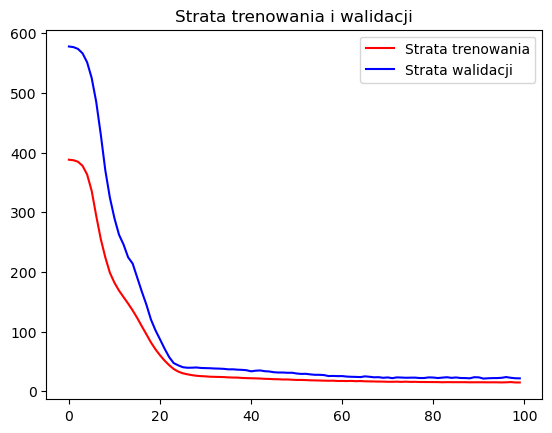

In [103]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'r', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [104]:
min(val_loss) 

21.24267578125

Model ze stosem warstw rekurencyjnych

In [105]:
model = keras.models.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(32, activation='relu', return_sequences=True),
    keras.layers.LSTM(8, activation='relu', return_sequences=True),
    keras.layers.LSTM(16, activation='relu'),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [106]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_validation, y_validation)
)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 389.7246 - val_loss: 578.0806
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 387.3856 - val_loss: 577.9718
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 390.9187 - val_loss: 577.2552
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 383.5353 - val_loss: 561.4771
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 359.9251 - val_loss: 459.9686
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 241.2083 - val_loss: 312.2712
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 198.7723 - val_loss: 276.9802
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 174.6810 - val_loss: 236.3737
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 152.0685 - val_loss: 218.4137
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 130.4250 - val_loss: 189.1607
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 109.5492 - val_loss: 152.4680
Epoch 12/50
24/24 ━━━━━━━━━━

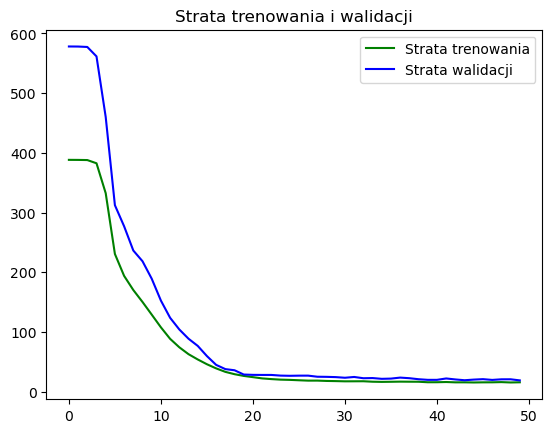

In [107]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [108]:
min(val_loss)

18.87303352355957

Lstm ze stosem warstw z mniejszą liczbą neuronów w każdej

In [109]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(8, activation='relu'),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [110]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 393.3951 - val_loss: 578.0287
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 387.1665 - val_loss: 577.8392
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 389.8793 - val_loss: 577.4249
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 380.2359 - val_loss: 576.0109
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 381.2484 - val_loss: 571.1682
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 381.8369 - val_loss: 558.6998
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 357.2777 - val_loss: 533.3043
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 328.1414 - val_loss: 485.8913
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 256.1240 - val_loss: 414.4545
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 220.5027 - val_loss: 339.4016
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 181.7863 - val_loss: 288.9953
Epoch 12/100
24/2

Epoch 68/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.0034 - val_loss: 22.5398
Epoch 69/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.0688 - val_loss: 21.1887
Epoch 70/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.1405 - val_loss: 20.8428
Epoch 71/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.4364 - val_loss: 22.8636
Epoch 72/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.5949 - val_loss: 22.2026
Epoch 73/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.2908 - val_loss: 21.4026
Epoch 74/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.6198 - val_loss: 21.2414
Epoch 75/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.4426 - val_loss: 20.7118
Epoch 76/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.1238 - val_loss: 21.0636
Epoch 77/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.4628 - val_loss: 21.8127
Epoch 78/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.3252 - val_loss: 21.5656
Epoch 79/100
24/24 ━━━━━━━━━━━━

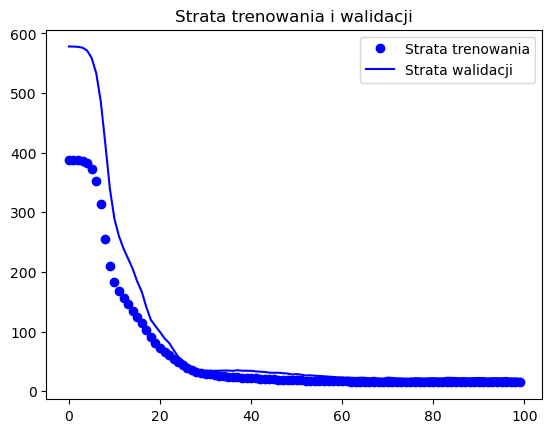

In [111]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [112]:
min(val_loss)

20.711780548095703

Lstm ze stosem większej liczby warstw

In [113]:
model = keras.models.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(32, activation='relu', return_sequences=True),
    keras.layers.LSTM(16, activation='relu', return_sequences=True),
    keras.layers.LSTM(8, activation='relu'),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [114]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_validation, y_validation)
)

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 389.6498 - val_loss: 578.0920
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 386.5842 - val_loss: 578.0060
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 385.2737 - val_loss: 577.5317
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 380.8177 - val_loss: 562.9203
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 350.1944 - val_loss: 467.2028
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 237.3557 - val_loss: 314.5880
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 205.2994 - val_loss: 268.0090
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 170.6263 - val_loss: 244.6830
Epoch 9/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 155.6702 - val_loss: 212.0691
Epoch 10/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 130.5099 - val_loss: 166.7932
Epoch 11/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 106.4812 - val_loss: 125.0362
Epoch 12/30
24/24 ━━━━━━━━━

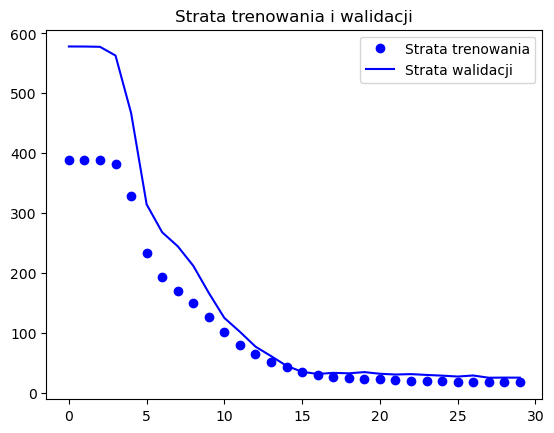

In [115]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [116]:
min(val_loss) 

25.297515869140625

Model lstm jak w ML STR  503 (modyfikacja zmiana f. aktywacji)

In [117]:
model = keras.models.Sequential([
    keras.layers.LSTM(32,activation='relu', input_shape=(n_steps, X_train.shape[2]), return_sequences=True),
    keras.layers.LSTM(20,activation='relu'),  # return_sequences=False (domyślnie)
    keras.layers.Dense(1, use_bias=False) # keras.layers.TimeDistributed(keras.layers.Dense(1)) dawał by y_predict jako (batch_size, n_steps, 1)
])


model.compile(optimizer='adam', loss='mae')

In [121]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17.2829 - val_loss: 26.0107
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.8762 - val_loss: 25.3817
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.4862 - val_loss: 25.5058
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.0340 - val_loss: 25.5347
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.2935 - val_loss: 25.1169
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 17.7447 - val_loss: 25.1139
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.3733 - val_loss: 24.5389
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.8547 - val_loss: 25.0360
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.0367 - val_loss: 25.2511
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.7126 - val_loss: 24.2597
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.0836 - val_loss: 25.0167
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━

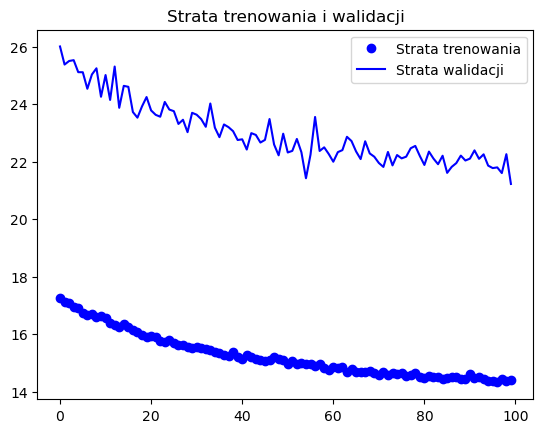

In [122]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [123]:
min(val_loss)

21.226093292236328

### optymalizacja hiperparametrów 2 najlepszych modeli

Model 1

In [124]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError

# Budowanie modelu z przestrzenią hiperparametrów
def build_model_1(hp):
    model = Sequential()
    
    # Liczba neuronów LSTM
    model.add(LSTM(
        units=hp.Int('units_lstm1', min_value=8, max_value=64, step=8),
        activation='relu',
        return_sequences = True,
        input_shape=(n_steps, X_train.shape[2])
    ))
    
    model.add(LSTM(
        units=hp.Int('units_lstm2', min_value=8, max_value=32, step=4),
        activation='relu',
        return_sequences = True
    ))
    
    model.add(LSTM(
        units=hp.Int('units_lstm3', min_value=4, max_value=16, step=2),
        activation='relu',
        return_sequences = True
    ))
    
    model.add(LSTM(
        units=hp.Int('units_lstm4', min_value=4, max_value=16, step=2),
        activation='relu'
    ))
    
    # Gęsta warstwa
    model.add(Dense(
        units=hp.Int('units_dense', min_value=1, max_value=8, step=2),
        activation='relu'
    ))

    # Wyjście
    model.add(Dense(1))

    # Optymalizator (tu: learning rate jako hiperparametr)
    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss=MeanAbsoluteError()
    )
    
    return model

In [125]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model_1,
    objective='val_loss',
    max_trials=10,  # liczba różnych konfiguracji do przetestowania
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning',
    overwrite=True  # <<< TO ZRESETUJE tuner
)

tuner.search(X_train, y_train, 
             epochs=20, 
             validation_data=(X_validation, y_validation),
             callbacks=[])

# Wyświetlenie najlepszych hiperparametrów
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"Najlepsze hiperparametry: LSTM: {best_hps.get('units_lstm1')}, {best_hps.get('units_lstm2')},\
{best_hps.get('units_lstm3')},{best_hps.get('units_lstm4')}, Dense: {best_hps.get('units_dense')},\
LR: {best_hps.get('learning_rate')}")


Trial 10 Complete [00h 00m 19s]
val_loss: 38.461341857910156

Best val_loss So Far: 19.92831039428711
Total elapsed time: 00h 03m 29s
Najlepsze hiperparametry: LSTM: 40, 20,10,16, Dense: 3,LR: 0.0038017118026419682


In [127]:
model = keras.models.Sequential([
    keras.layers.LSTM(40, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(20, activation='relu', return_sequences=True),
    keras.layers.LSTM(10, activation='relu', return_sequences=True),
    keras.layers.LSTM(16, activation='relu'),
    keras.layers.Dense(3, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.0038017118026419682)
model.compile(optimizer=optimizer, loss='mae')

#########

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 393.4200 - val_loss: 578.0322
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 391.3459 - val_loss: 577.6568
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 390.8449 - val_loss: 538.6016
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 300.1400 - val_loss: 265.7559
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 174.2357 - val_loss: 207.2976
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 134.7690 - val_loss: 158.0657
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 101.2757 - val_loss: 106.8382
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.2220 - val_loss: 59.2801
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 38.9272 - val_loss: 39.9744
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28.8889 - val_loss: 34.3855
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25.1550 - val_loss: 32.1602
Epoch 12/100
24/24 ━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.6585 - val_loss: 19.1403
Epoch 69/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.5652 - val_loss: 20.4309
Epoch 70/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.7291 - val_loss: 19.1653
Epoch 71/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.1190 - val_loss: 26.7097
Epoch 72/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.7673 - val_loss: 19.5718
Epoch 73/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.0917 - val_loss: 19.8904
Epoch 74/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.1585 - val_loss: 21.6338
Epoch 75/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.2725 - val_loss: 21.8907
Epoch 76/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.6299 - val_loss: 24.3442
Epoch 77/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.1999 - val_loss: 19.0363
Epoch 78/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.2579 - val_loss: 23.3656
Epoch 79/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 

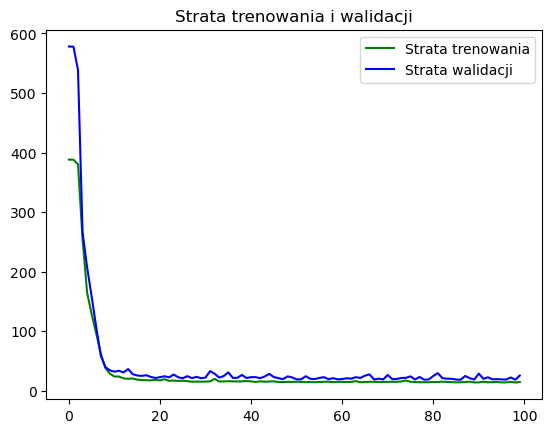

18.614259719848633


In [128]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

Model 2

In [228]:
# Budowanie modelu z przestrzenią hiperparametrów
def build_model_2(hp):
    model = Sequential()
    
    # Liczba neuronów LSTM
    model.add(LSTM(
        units=hp.Int('units_lstm1', min_value=8, max_value=64, step=8),
        activation='relu',
        return_sequences = True,
        input_shape=(n_steps, X_train.shape[2])
    ))
    
    model.add(LSTM(
        units=hp.Int('units_lstm2', min_value=4, max_value=32, step=2),
        activation='relu'
    ))
    
    # Gęsta warstwa
    model.add(Dense(
        units=hp.Int('units_dense', min_value=1, max_value=8, step=2),
        activation='relu'
    ))

    # Wyjście
    model.add(Dense(1))

    # Optymalizator (tu: learning rate jako hiperparametr)
    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss=MeanAbsoluteError()
    )
    
    return model

In [229]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model_2,
    objective='val_loss',
    max_trials=15,  # liczba różnych konfiguracji do przetestowania
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning',
    overwrite=True  # <<< TO ZRESETUJE tuner
)

tuner.search(X_train, y_train, 
             epochs=20, 
             validation_data=(X_validation, y_validation),
             callbacks=[])

# Wyświetlenie najlepszych hiperparametrów
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"Najlepsze hiperparametry: LSTM: {best_hps.get('units_lstm1')}, {best_hps.get('units_lstm2')},\
Dense: {best_hps.get('units_dense')}, LR: {best_hps.get('learning_rate')}")


Trial 15 Complete [00h 00m 15s]
val_loss: 297.1272888183594

Best val_loss So Far: 21.727794647216797
Total elapsed time: 00h 06m 02s
Najlepsze hiperparametry: LSTM: 24, 22,Dense: 5, LR: 0.007616422224295583


In [231]:
model = keras.models.Sequential([
    keras.layers.LSTM(24,activation='relu', input_shape=(n_steps, X_train.shape[2]), return_sequences=True),
    keras.layers.LSTM(22,activation='relu'),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1) 
])

optimizer = keras.optimizers.Adam(learning_rate=0.007616422224295583)
model.compile(optimizer=optimizer, loss='mae')

#########

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 384.9840 - val_loss: 573.7089
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 356.8469 - val_loss: 463.3037
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 229.2059 - val_loss: 187.2386
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 118.1242 - val_loss: 119.3396
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.4751 - val_loss: 52.7436
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40.8946 - val_loss: 42.5193
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31.9186 - val_loss: 40.0924
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.3752 - val_loss: 49.3040
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.5135 - val_loss: 33.8735
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.5744 - val_loss: 29.5915
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.9398 - val_loss: 26.0554
Epoch 12/100
24/24 ━━━━━━━━━━━━━

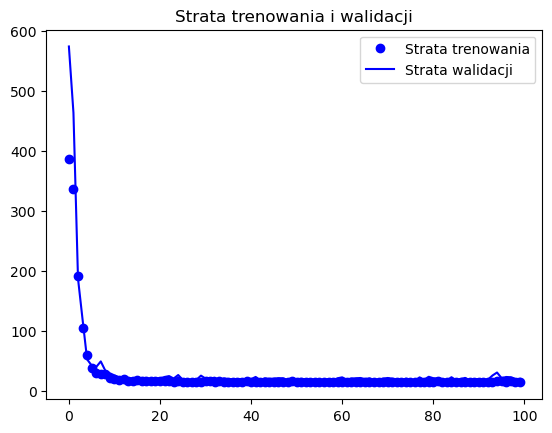

17.829496383666992


In [232]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

Najlepszy model z regularyzacją

In [90]:
model = keras.models.Sequential([
    keras.layers.LSTM(24, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(20, activation='relu', return_sequences=True),
    keras.layers.LSTM(16, activation='relu', return_sequences=True),
    keras.layers.LSTM(4, activation='relu'),
    keras.layers.Dense(1, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.006147242799935061)
model.compile(optimizer=optimizer, loss='mae')

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

# Tworzenie callbacku EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # monitorowanie straty walidacyjnej
    patience=20,              #liczba epok bez poprawy, po których zatrzyma trenowanie
    restore_best_weights=True  # przywróć najlepsze wagi po zatrzymaniu
)

history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 387.4095 - val_loss: 575.1196
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 376.9957 - val_loss: 327.7900
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 185.5569 - val_loss: 225.4021
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 120.4076 - val_loss: 102.7974
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 56.4978 - val_loss: 41.0226
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.8017 - val_loss: 37.3425
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.1642 - val_loss: 35.3329
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.6362 - val_loss: 42.4232
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.5491 - val_loss: 28.0680
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5272 - val_loss: 21.6694
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.1102 - val_loss: 14.4787
Epoch 12/200
24/24 ━━━━━━━━━━━━━

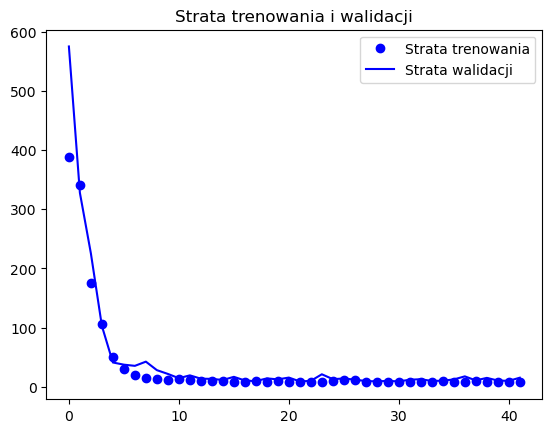

9.008028030395508


In [92]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

l1

In [94]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1
from keras.optimizers import Adam

# Ustal poziom regularyzacji L1
l1_reg = 1e-4  # lambda karanie wag

model = keras.models.Sequential([
    keras.layers.LSTM(24, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True,kernel_regularizer=l1(l1_reg)),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(20, activation='relu', return_sequences=True,kernel_regularizer=l1(l1_reg)),
    keras.layers.LSTM(16, activation='relu', return_sequences=True,kernel_regularizer=l1(l1_reg)),
    keras.layers.LSTM(4, activation='relu',kernel_regularizer=l1(l1_reg)),
    keras.layers.Dense(1, activation="relu",kernel_regularizer=l1(l1_reg)),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.006147242799935061)
model.compile(optimizer=optimizer, loss='mae')

#########

history = model.fit(
    X_train, y_train,
    epochs=140,
    validation_data=(X_validation, y_validation)
)

Epoch 1/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 382.3322 - val_loss: 576.1428
Epoch 2/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 383.2984 - val_loss: 575.9843
Epoch 3/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 385.5057 - val_loss: 575.7254
Epoch 4/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 392.4642 - val_loss: 575.1643
Epoch 5/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 383.5198 - val_loss: 573.9929
Epoch 6/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 386.4592 - val_loss: 569.5580
Epoch 7/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 363.9956 - val_loss: 347.8829
Epoch 8/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 216.1424 - val_loss: 215.3800
Epoch 9/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 175.7514 - val_loss: 168.8593
Epoch 10/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 129.9489 - val_loss: 124.9428
Epoch 11/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76.8608 - val_loss: 48.1641
Epoch 12/140
24/24 

Epoch 136/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4604 - val_loss: 9.5202
Epoch 137/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4425 - val_loss: 8.3663
Epoch 138/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3650 - val_loss: 8.1692
Epoch 139/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3295 - val_loss: 7.6869
Epoch 140/140
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.0136 - val_loss: 8.2025


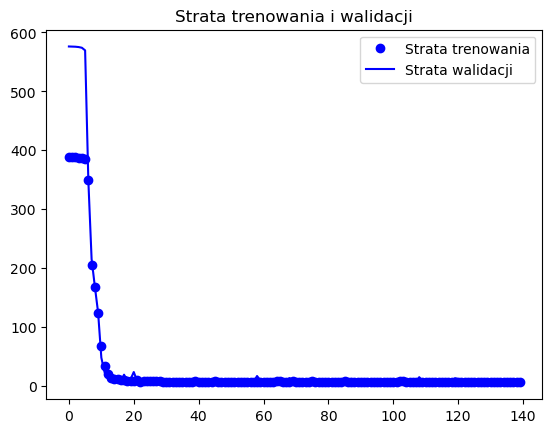

6.827133655548096


In [95]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

l2

In [98]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1, l2
from keras.optimizers import Adam


l2_reg = 1e-4  

model = keras.models.Sequential([
    keras.layers.LSTM(24, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True,kernel_regularizer=l2(l2_reg)),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(20, activation='relu', return_sequences=True,kernel_regularizer=l2(l2_reg)),
    keras.layers.LSTM(16, activation='relu', return_sequences=True,kernel_regularizer=l2(l2_reg)),
    keras.layers.LSTM(4, activation='relu',kernel_regularizer=l2(l2_reg)),
    keras.layers.Dense(1, activation="relu",kernel_regularizer=l2(l2_reg)),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.006147242799935061)
model.compile(optimizer=optimizer, loss='mae')


#########

history = model.fit(
    X_train, y_train,
    epochs=70,
    validation_data=(X_validation, y_validation)
)

Epoch 1/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - loss: 386.4579 - val_loss: 575.7621
Epoch 2/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 382.2425 - val_loss: 462.1567
Epoch 3/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 232.6473 - val_loss: 238.0510
Epoch 4/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 142.1262 - val_loss: 142.6965
Epoch 5/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83.4860 - val_loss: 62.9473
Epoch 6/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 48.7748 - val_loss: 30.8158
Epoch 7/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28.4019 - val_loss: 35.4073
Epoch 8/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.8193 - val_loss: 43.2028
Epoch 9/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.8682 - val_loss: 24.6967
Epoch 10/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.9917 - val_loss: 25.4013
Epoch 11/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.3047 - val_loss: 19.9980
Epoch 12/70
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 

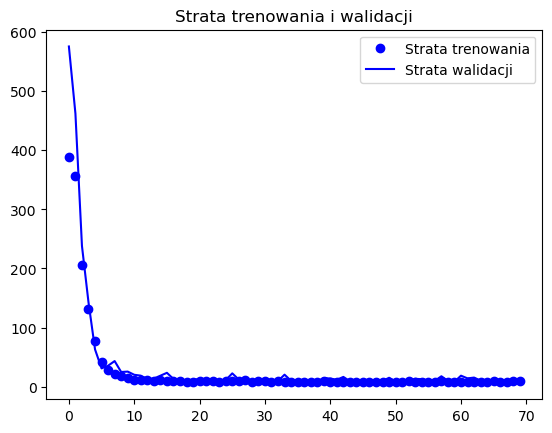

7.824329853057861


In [99]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

### l1 i earlystopping M1

In [92]:
import keras
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1
from keras.optimizers import Adam

# Ustal poziom regularyzacji L1
l1_reg = 1e-4  # lambda karanie wag, 1e-5 było za małe i model nie potrafił generalizaowac bład na walidacji nie zmniejszal sie

model = keras.models.Sequential([
    keras.layers.LSTM(40, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True,kernel_regularizer=l1(l1_reg)),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(20, activation='relu', return_sequences=True,kernel_regularizer=l1(l1_reg)),
    keras.layers.LSTM(10, activation='relu', return_sequences=True,kernel_regularizer=l1(l1_reg)),
    keras.layers.LSTM(16, activation='relu',kernel_regularizer=l1(l1_reg)),
    keras.layers.Dense(3, activation="relu",kernel_regularizer=l1(l1_reg)),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.0038017118026419682)
model.compile(optimizer=optimizer, loss='mae')


C:\Users\kinga\AppData\Local\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [93]:
from tensorflow.keras.callbacks import EarlyStopping

# Tworzenie callbacku EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # monitorowanie straty walidacyjnej
    patience=20,              #liczba epok bez poprawy, po których zatrzyma trenowanie
    restore_best_weights=True  # przywróć najlepsze wagi po zatrzymaniu
)

history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - loss: 382.7203 - val_loss: 577.8798
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 392.5681 - val_loss: 573.4827
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 335.1134 - val_loss: 317.7164
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 187.1194 - val_loss: 221.7730
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 131.9527 - val_loss: 125.8757
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 80.1805 - val_loss: 83.7975
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 55.3298 - val_loss: 45.8592
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40.9578 - val_loss: 35.1361
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27.2799 - val_loss: 32.6214
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.9217 - val_loss: 33.8209
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.1671 - val_loss: 49.0165
Epoch 12/200
24/24 ━━━━━━━━

Epoch 68/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 15.2140 - val_loss: 20.6077
Epoch 69/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.2404 - val_loss: 22.7955
Epoch 70/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.6661 - val_loss: 20.3323
Epoch 71/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.5987 - val_loss: 19.1528
Epoch 72/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.2845 - val_loss: 26.6393
Epoch 73/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.1643 - val_loss: 20.2366
Epoch 74/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.2085 - val_loss: 25.0816
Epoch 75/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.1481 - val_loss: 19.1165
Epoch 76/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.9114 - val_loss: 18.5658
Epoch 77/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.3450 - val_loss: 20.0369
Epoch 78/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.3723 - val_loss: 27.1856


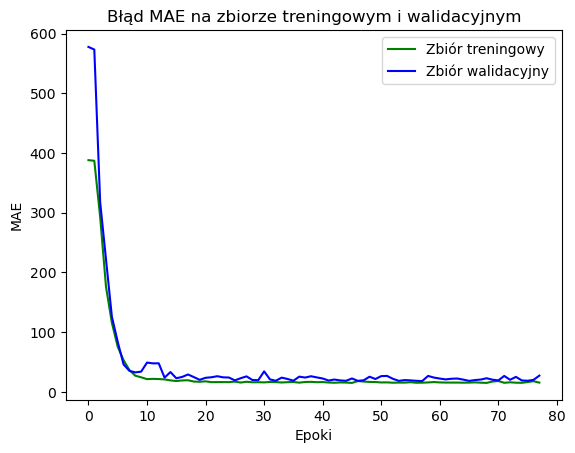

18.09014892578125


In [94]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Zbiór treningowy')
plt.plot(epochs, val_loss, 'b', label='Zbiór walidacyjny')
plt.title('Błąd MAE na zbiorze treningowym i walidacyjnym')
plt.legend()
plt.xlabel('Epoki')
plt.ylabel('MAE')

plt.show()

####################
print(min(val_loss))

### l1 i earlystopping M2

In [233]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1
from keras.optimizers import Adam

# Ustal poziom regularyzacji L1
l1_reg = 1e-4  # lambda karanie wag, 1e-5 było za małe i model nie potrafił generalizaowac bład na walidacji nie zmniejszal sie

model = keras.models.Sequential([
    keras.layers.LSTM(24,activation='relu', input_shape=(n_steps, X_train.shape[2]), return_sequences=True,\
                      kernel_regularizer=l1(l1_reg)),
    keras.layers.LSTM(22,activation='relu',kernel_regularizer=l1(l1_reg)),
    keras.layers.Dense(5, activation="relu",kernel_regularizer=l1(l1_reg)),
    keras.layers.Dense(1) 
])

optimizer = keras.optimizers.Adam(learning_rate=0.007616422224295583)
model.compile(optimizer=optimizer, loss='mae')

In [234]:
from tensorflow.keras.callbacks import EarlyStopping

# Tworzenie callbacku EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # monitorowanie straty walidacyjnej
    patience=20,              #liczba epok bez poprawy, po których zatrzyma trenowanie
    restore_best_weights=True  # przywróć najlepsze wagi po zatrzymaniu
)

history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - loss: 389.8649 - val_loss: 573.0567
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 360.0206 - val_loss: 424.2532
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 213.3685 - val_loss: 197.2753
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 129.1016 - val_loss: 115.0891
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 70.9161 - val_loss: 55.0031
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 43.8505 - val_loss: 36.7237
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 31.4519 - val_loss: 33.1308
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 26.0972 - val_loss: 35.2227
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 23.3708 - val_loss: 34.6139
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 21.8207 - val_loss: 37.9364
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20.8209 - val_loss: 29.5492
Epoch 12/200
24/24 ━

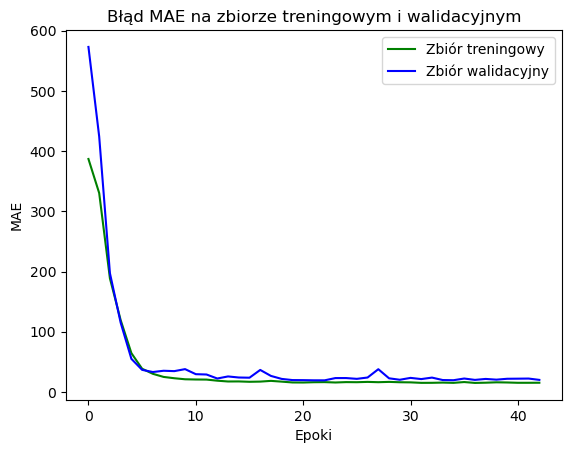

19.334136962890625


In [243]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Zbiór treningowy')
plt.plot(epochs, val_loss, 'b', label='Zbiór walidacyjny')
plt.title('Błąd MAE na zbiorze treningowym i walidacyjnym')
plt.legend()
plt.xlabel('Epoki')
plt.ylabel('MAE')

plt.show()

####################
print(min(val_loss))

### Actual vs predicted M1

Scatter plots

In [95]:
train_pred = model.predict(X_train)
validation_pred = model.predict(X_validation)
test_pred = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


Przesunięcie predykcji o 3 dni (predykcja opóźniona względem rzeczywistości)

In [96]:
y_train_3 = y_train[:-3]
train_pred_3 = train_pred[3:]
y_validation_3 = y_validation[:-3]
validation_pred_3 = validation_pred[3:]
y_test_3 = y_test[:-3]
test_pred_3 = test_pred[3:]

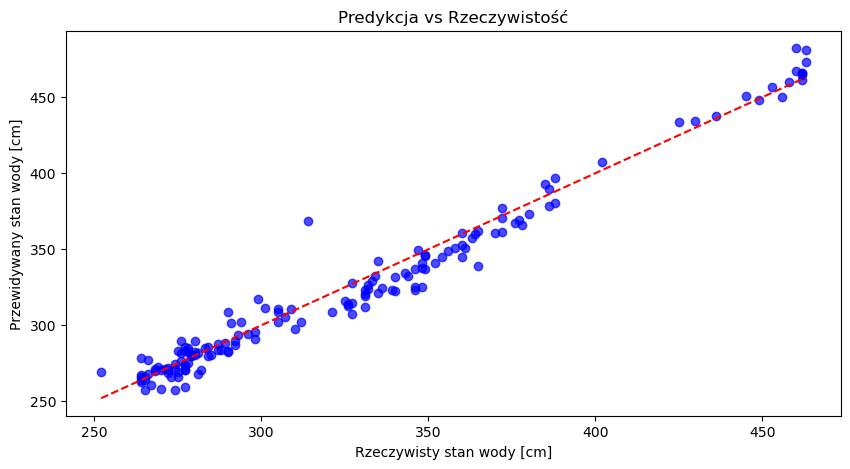

In [97]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_3, test_pred_3, alpha=0.7, color="blue")
plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], color="red", linestyle="dashed")  # Idealne dopasowanie
plt.xlabel("Rzeczywisty stan wody [cm]")
plt.ylabel("Przewidywany stan wody [cm]")
plt.title("Predykcja vs Rzeczywistość")
plt.show()

Dopasowanie

In [98]:
def plot_predictions_with_error(true_data, predicted_data, title):
    plt.figure(figsize=(10, 12))
    
    # Flatten arrays to ensure compatibility with matplotlib
    true_data_flatten = true_data.flatten()
    predicted_data_flatten = predicted_data.flatten()
    
    # Calculate error
    error = true_data_flatten - predicted_data_flatten
    positive_error_std = np.std(error[error >= 0])
    negative_error_std = np.std(error[error < 0])
    mae = sum(np.abs(error))/len(error)
    print(f"Błąd MAE {mae}")
    # Plot true data vs. predicted data
    ax1 = plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    ax1.plot(true_data_flatten, label='Prawdziwe dane')
    ax1.plot(predicted_data_flatten, label='Wartości przewidywane', alpha=0.7)
    ax1.set_title(title)
    ax1.set_ylabel('Stan wody [cm]')
    ax1.set_xlabel('Dni')
    #ustawienie stałej skali na osi Y, gdy używam oryginalnej skali danych, nie mieszczacej się w zakresie [0,1]
    if true_data[0] > 1:
        ax1 = plt.gca()
        ax1.set_ylim([200, 800])
    ax1.legend()

Training MAE
Błąd MAE 8.551323318997643
Validation MAE
Błąd MAE 8.627244825487013
Test MAE
Błąd MAE 7.485381683745942


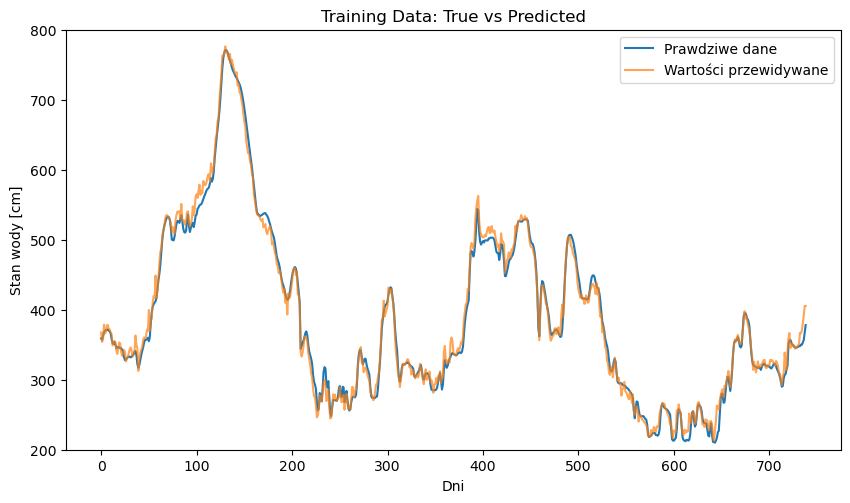

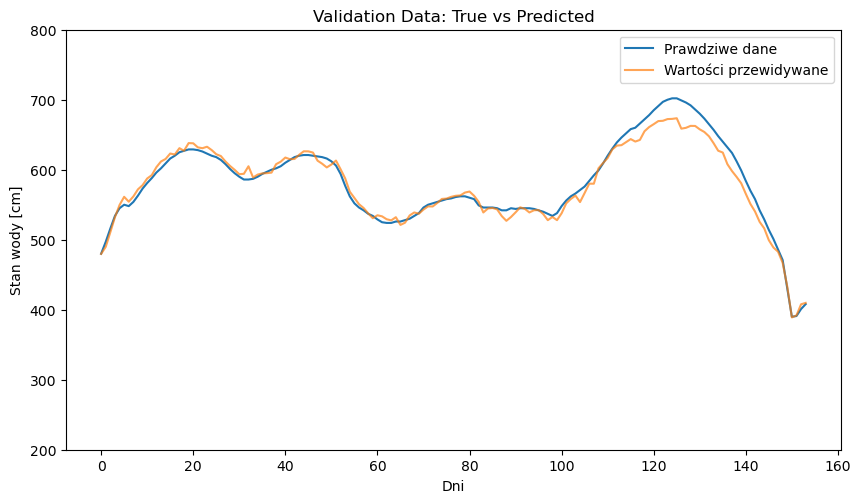

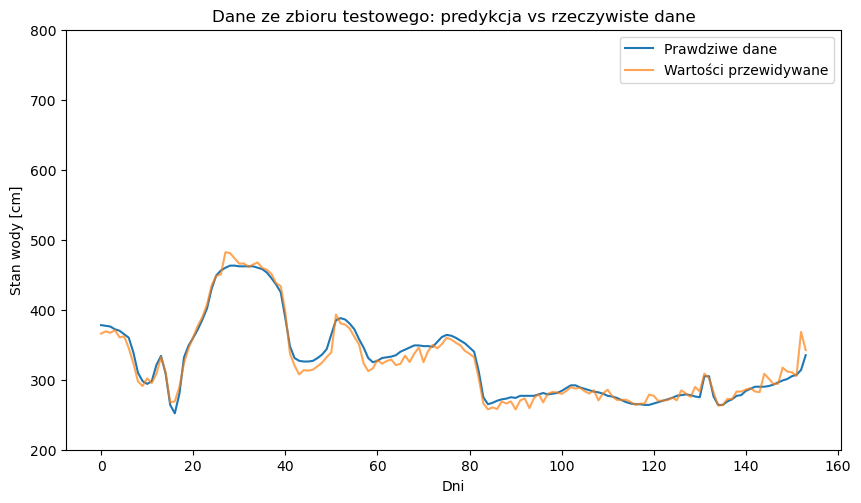

In [99]:
print("Training MAE")
plot_predictions_with_error(y_train_3, train_pred_3, 'Training Data: True vs Predicted')
print("Validation MAE")
plot_predictions_with_error(y_validation_3, validation_pred_3, 'Validation Data: True vs Predicted')
print("Test MAE")
plot_predictions_with_error(y_test_3, test_pred_3, 'Dane ze zbioru testowego: predykcja vs rzeczywiste dane')

Ocena modelu

In [100]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def smape(y_true, y_pred):
    """
    Symmetric Mean Absolute Percentage Error
    """
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0  # Unikamy dzielenia przez 0
    return 100 * np.mean(diff)

def evaluate_model(y_true, y_pred):
    # Upewnij się, że dane są spłaszczone
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    smape_score = smape(y_true, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"sMAPE: {smape_score:.2f}%")


In [101]:
evaluate_model(y_test_3, test_pred_3)

RMSE: 10.0721
R²: 0.9685
sMAPE: 2.32%


### Actual vs predicted M2

Scatter plots

In [236]:
train_pred = model.predict(X_train)
validation_pred = model.predict(X_validation)
test_pred = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Przesunięcie predykcji o 3 dni (predykcja opóźniona względem rzeczywistości)

In [237]:
y_train = y_train[:-3]
train_pred = train_pred[3:]
y_validation = y_validation[:-3]
validation_pred = validation_pred[3:]
y_test = y_test[:-3]
test_pred = test_pred[3:]

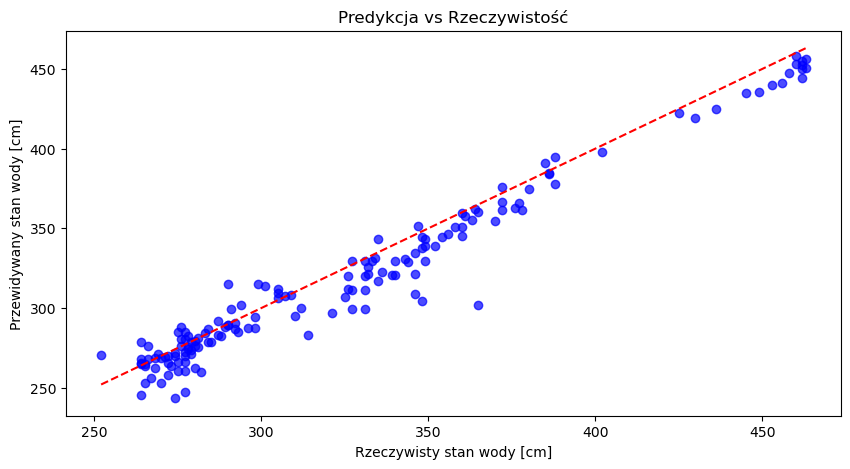

In [238]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, test_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")  # Idealne dopasowanie
plt.xlabel("Rzeczywisty stan wody [cm]")
plt.ylabel("Przewidywany stan wody [cm]")
plt.title("Predykcja vs Rzeczywistość")
plt.show()

Dopasowanie

In [239]:
def plot_predictions_with_error(true_data, predicted_data, title):
    plt.figure(figsize=(10, 12))
    
    # Flatten arrays to ensure compatibility with matplotlib
    true_data_flatten = true_data.flatten()
    predicted_data_flatten = predicted_data.flatten()
    
    # Calculate error
    error = true_data_flatten - predicted_data_flatten
    positive_error_std = np.std(error[error >= 0])
    negative_error_std = np.std(error[error < 0])
    mae = sum(np.abs(error))/len(error)
    print(f"Błąd MAE {mae}")
    # Plot true data vs. predicted data
    ax1 = plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    ax1.plot(true_data_flatten, label='Prawdziwe dane')
    ax1.plot(predicted_data_flatten, label='Wartości przewidywane', alpha=0.7)
    ax1.set_title(title)
    ax1.set_ylabel('Stan wody [cm]')
    ax1.set_xlabel('Dni')
    #ustawienie stałej skali na osi Y, gdy używam oryginalnej skali danych, nie mieszczacej się w zakresie [0,1]
    if true_data[0] > 1:
        ax1 = plt.gca()
        ax1.set_ylim([200, 800])
    ax1.legend()

Training MAE
Błąd MAE 10.251953021760562
Validation MAE
Błąd MAE 10.766148554814325
Test MAE
Błąd MAE 9.784570669198965


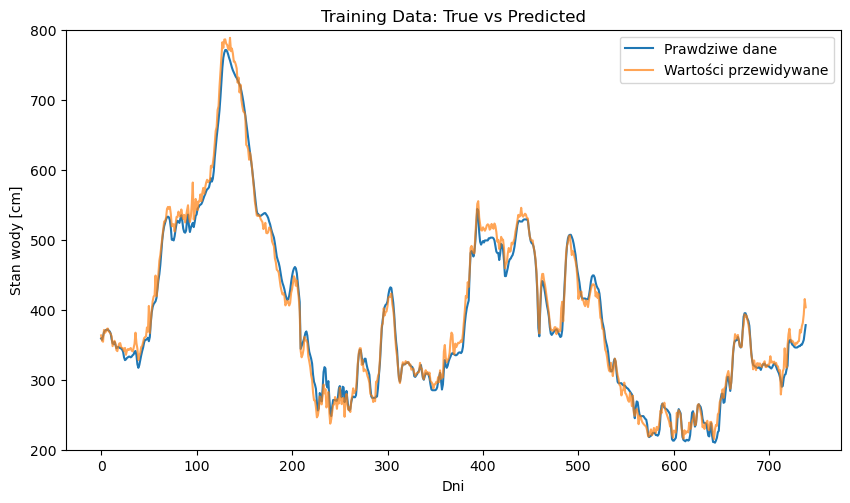

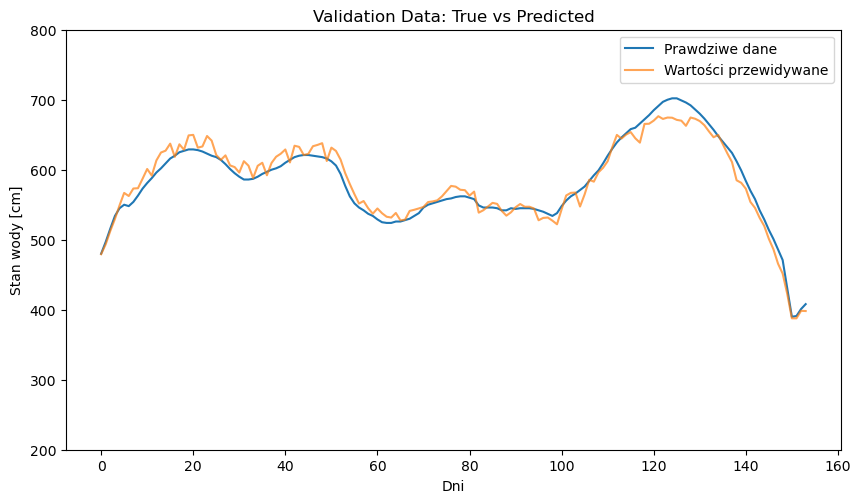

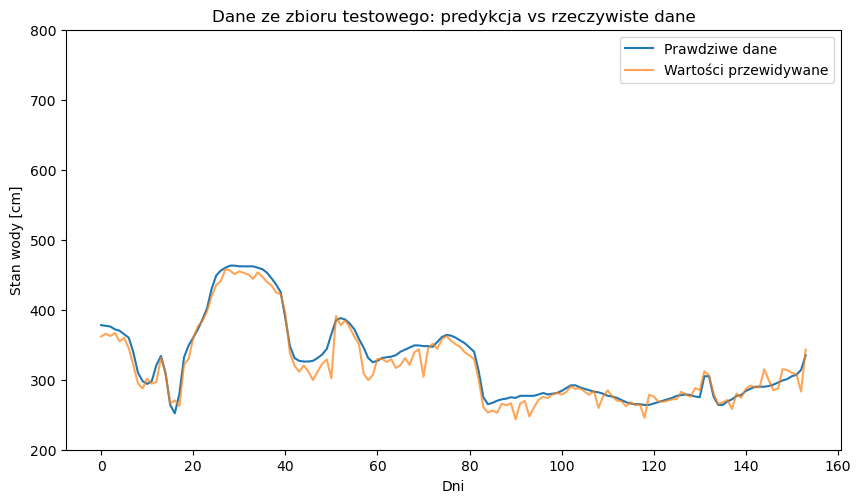

In [240]:
print("Training MAE")
plot_predictions_with_error(y_train, train_pred, 'Training Data: True vs Predicted')
print("Validation MAE")
plot_predictions_with_error(y_validation, validation_pred, 'Validation Data: True vs Predicted')
print("Test MAE")
plot_predictions_with_error(y_test, test_pred, 'Dane ze zbioru testowego: predykcja vs rzeczywiste dane')

Ocena modelu

In [241]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def smape(y_true, y_pred):
    """
    Symmetric Mean Absolute Percentage Error
    """
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0  # Unikamy dzielenia przez 0
    return 100 * np.mean(diff)

def evaluate_model(y_true, y_pred):
    # Upewnij się, że dane są spłaszczone
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    smape_score = smape(y_true, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"sMAPE: {smape_score:.2f}%")


In [242]:
evaluate_model(y_test, test_pred)

RMSE: 13.2420
R²: 0.9455
sMAPE: 3.08%
